# 0. Introduction

In 2015, the United Nations developed a set of 8 goals known as The Millennium Development Goals. These goals were developed as methods to improve the conditions of the planet as well as our living conditions.

From these goals, *Goal 7: Ensure environmental sustainability*, with its key indicators, will be the basis for the exploratory data analysis that will be done on the dataset obtained on the Millenium Development Goals [site](http://mdgs.un.org/). Using the dataset the EDA will focus on answering the questions posed on the African coding network instructions [page](http://syllabus.africacode.net/projects/data-science-specific/statistical-thinking/).


## 0.1 Installing the required packages

To perform the analysis with the given questions, the required Python packages will be installed onto the notebook, those being numpy, pandas, matplotlib, scipy and seaborn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import statsmodels.api as sm

___

# 1 Data Processing and Cleaning 

The next stage involves reading the data, knowing how it is structured, looking at a summarized version of the dataframe and making any changes to the dataframe, either through the cleaning or answering some minor questions before taking a deeper dive into the analysis part.

Now that the libraries that will be used have been installed the next step is to read the csv file with an appropriate dataframe name.

In [2]:
mdg_raw_df = pd.read_csv("../data/MDG_Export_20191227.csv", sep=',', skipinitialspace=True)

The code to read in the csv file takes into account the fact that there are spaces in between certain commas and this would make them appear as empty spaces in the df making the cleaning, processing and analysis difficult.


 Next step is to find out what type of data this csv file consists of.

In [3]:
mdg_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryCode   690 non-null    int64  
 1   Country       690 non-null    object 
 2   SeriesCode    690 non-null    int64  
 3   MDG           690 non-null    object 
 4   Series        690 non-null    object 
 5   1990          627 non-null    float64
 6   Footnotes     5 non-null      float64
 7   Type          628 non-null    object 
 8   1991          182 non-null    float64
 9   Footnotes.1   0 non-null      float64
 10  Type.1        182 non-null    object 
 11  1992          204 non-null    float64
 12  Footnotes.2   0 non-null      float64
 13  Type.2        204 non-null    object 
 14  1993          204 non-null    float64
 15  Footnotes.3   0 non-null      float64
 16  Type.3        204 non-null    object 
 17  1994          205 non-null    float64
 18  Footnotes.4   0 non-null      

The dataframe consists of 690 rows and 95 columns. The column names are Country code, Country, Series code, MDG, and Series, it has years starting from 1990 all the way to 2019, Footnotes and 'type' that start from 1 to 29.

Here is a summary of what the dataframe looks like. 

In [4]:
mdg_raw_df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.10,NaN,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.90,NaN,G,2493.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.80,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488.00,NaN,G,3971.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the summary, each country has 3 rows that look at different factors according to series, these are:
* Proportion of land area covered by forest, percentage (567)
* Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC) (749)
* Terrestrial and marine areas protected to the total territorial area, percentage (616)

Each factor has its own series code listed in parentheses. The measurements for all three factors are taken for all countries in the dataframe from 1990 to 2019, with a large number of nan values in the years from 2015 - 2019, including the years 2012 and 2013 as well as their associated footnotes and type.

Each series in the classification is a numerical measurement of a physical substance, represented as a percentage or a unit of mass. This implies that all values in the table for the series should be positive and numerical. It is now necessary to verify if there are any entries that fail to meet these requirements.

In [5]:
def check_invalid_values(df):
    float_type_columns = df.select_dtypes(include=float)
    invalid_values_found = False

    for column in float_type_columns.columns:
        for value in df[column]:
            if not isinstance(value, (int, float)) or value < 0:
                print(f"Column: {column}, Value: {value}")
                invalid_values_found = True
    
    if not invalid_values_found:
        print("No invalid values found in columns.")


check_invalid_values(mdg_raw_df)


Column: 1990, Value: -2999.6


The aforementioned code operates through a dataframe named 'float_type_columns' containing columns solely with float-type data. Subsequently, the code iterates through each column and inspects every value within it. Any non-float or negative value is identified and printed. Upon completing the iteration across all columns, only one negative value was detected in the '1990' column. The next step is to now change the value to a positive.

In [6]:
mdg_raw_df['1990'] = mdg_raw_df['1990'].apply(lambda x: abs(x) if isinstance(x, float) and x < 0 else x)

check_invalid_values(mdg_raw_df)


No invalid values found in columns.


It appears that the only values that are present within the float-type columns are positive and numerical.

* ### Countries in the dataset and missing values.

Now that there is a better understanding of the data in the dataset and it appears to be world data, does it consist of every country or a large number at the very least? Calculations will be done to determine the answer to this question. 

In [7]:
countries_in_df = mdg_raw_df.groupby('Country') 
number_of_countries = countries_in_df.ngroups
number_of_countries

230

By grouping the data in the countries column and assigning it to a dataframe and returning the size, there appear to be 230 countries represented in The Millennium Development Goals project.

Next is determining if there are any missing values in the country, series and columns representing the years as time goes by.

In [8]:
unique_countries = mdg_raw_df['Country'].unique()

missing_values_by_country_df = pd.DataFrame(index=unique_countries, columns=mdg_raw_df.columns)

for country in unique_countries:
    country_data = mdg_raw_df[mdg_raw_df['Country'] == country]
    null_values = country_data.isnull().sum()
    
    missing_values_by_country_df.loc[country] = null_values

missing_values_by_country_df.head()


,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
Afghanistan,0,0,0,0,0,0,3,0,2,3,...,3,3,3,3,3,3,3,3,3,3
Albania,0,0,0,0,0,0,3,0,2,3,...,3,3,3,3,3,3,3,3,3,3
Algeria,0,0,0,0,0,0,3,0,2,3,...,3,3,3,3,3,3,3,3,3,3
American Samoa,0,0,0,0,0,1,3,1,3,3,...,3,3,3,3,3,3,3,3,3,3
Andorra,0,0,0,0,0,1,3,1,3,3,...,3,3,3,3,3,3,3,3,3,3


The dataframe above represents the number of nan values per column for each country. The following dataframe is a summary of the above showing all the missing values for each country. 

In [9]:
pd.set_option('display.max_colwidth', None)

unique_countries = mdg_raw_df['Country'].unique()

missing_values_data = []

for country in unique_countries:
    country_data = mdg_raw_df[mdg_raw_df['Country'] == country]
    total_null_values = country_data.isnull().sum().sum()
    
    missing_values_data.append({'Country': country, 'missing_values_count': total_null_values})

missing_values_by_country_df = pd.DataFrame(missing_values_data)
missing_values_by_country_df.head()


,Country,missing_values_count
0,Afghanistan,212
1,Albania,212
2,Algeria,212
3,American Samoa,256
4,Andorra,222


The next grouping of the data is by the year.

In [10]:
years_columns = [col for col in mdg_raw_df.columns if col.isdigit()]
mdg_missing_values = mdg_raw_df[years_columns]

missing_values_by_year_df = pd.DataFrame(columns=['Year', 'missing_values_by_count'])

for year in years_columns:
    total_null_values = mdg_missing_values[year].isnull().sum()
    missing_values_by_year_df.loc[len(missing_values_by_year_df)] = [year, total_null_values]

missing_values_by_year_df



,Year,missing_values_by_count
0,1990,63
1,1991,508
2,1992,486
3,1993,486
4,1994,485
5,1995,483
6,1996,484
7,1997,481
8,1998,481
9,1999,481


Each country consists of 3 series column:
* Proportion of land area covered by forest, percentage (567)
* Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC) (749)
* Terrestrial and marine areas protected to the total territorial area, percentage (616)

Next is finding out the number of missing values per column categorised by these 3 series values


In [11]:
series_category = ["Proportion of land area covered by forest, percentage",
                   "Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)",
                   "Terrestrial and marine areas protected to total territorial area, percentage"]

selected_columns = [col for col in mdg_raw_df.columns if col != 'Series']
missing_values_by_series_df = pd.DataFrame(index=series_category, columns=selected_columns)

for category in series_category:
    category_data = mdg_raw_df[mdg_raw_df['Series'] == category]
    null_values = category_data[selected_columns].isnull().sum()
    
    missing_values_by_series_df.loc[category] = null_values

missing_values_by_series_df



,CountryCode,Country,SeriesCode,MDG,1990,Footnotes,Type,1991,Footnotes.1,Type.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
"Proportion of land area covered by forest, percentage",0,0,0,0,7,225,6,230,230,230,...,230,230,230,230,230,230,230,230,230,230
"Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)",0,0,0,0,49,230,49,48,230,48,...,230,230,230,230,230,230,230,230,230,230
"Terrestrial and marine areas protected to total territorial area, percentage",0,0,0,0,7,230,7,230,230,230,...,230,230,230,230,230,230,230,230,230,230


The dataframe below is a summary that displays the total number of missing values for each series category.

In [12]:
pd.set_option('display.max_colwidth', None)

series_category = [
    "Proportion of land area covered by forest, percentage",
    "Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)",
    "Terrestrial and marine areas protected to total territorial area, percentage"
]

selected_columns = [col for col in mdg_raw_df.columns if col != 'Series']
missing_values_by_series_df = pd.DataFrame(columns=['Series', 'missing_values_count'])

for category in series_category:
    category_data = mdg_raw_df[mdg_raw_df['Series'] == category]
    total_null_values = category_data[selected_columns].isnull().sum().sum()
    
    missing_values_by_series_df = pd.concat([missing_values_by_series_df, pd.DataFrame({'Series': [category], 'missing_values_count': [total_null_values]})], ignore_index=True)

missing_values_by_series_df

,Series,missing_values_count
0,"Proportion of land area covered by forest, percentage",18892
1,"Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)",11550
2,"Terrestrial and marine areas protected to total territorial area, percentage",19362


___

+ ## Identifying any issues within the data.
 
Before data analysis can be performed on the data it will need to be cleaned first, this is done by imputation to remove missing values within the dataframe as well as through removing some columns which will have no impact on the analysis carried out in this report.

The first step is taking a look at the dataframe

In [13]:
mdg_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryCode   690 non-null    int64  
 1   Country       690 non-null    object 
 2   SeriesCode    690 non-null    int64  
 3   MDG           690 non-null    object 
 4   Series        690 non-null    object 
 5   1990          627 non-null    float64
 6   Footnotes     5 non-null      float64
 7   Type          628 non-null    object 
 8   1991          182 non-null    float64
 9   Footnotes.1   0 non-null      float64
 10  Type.1        182 non-null    object 
 11  1992          204 non-null    float64
 12  Footnotes.2   0 non-null      float64
 13  Type.2        204 non-null    object 
 14  1993          204 non-null    float64
 15  Footnotes.3   0 non-null      float64
 16  Type.3        204 non-null    object 
 17  1994          205 non-null    float64
 18  Footnotes.4   0 non-null      

The first step of cleaning the dataframe is removing the columns that will not be needed, either because they will not aid in answering the analyses or they are entirely null.

All "Footnote" columns from 0 to 29 consist of a vast majority of only null values and as such should be dropped. All type columns of object type will also be dropped.

In [14]:
mdg_raw_df = mdg_raw_df.loc[:, ~mdg_raw_df.columns.str.contains('Footnote')]
mdg_raw_df = mdg_raw_df.loc[:, ~mdg_raw_df.columns.str.contains('Type')]

mdg_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  690 non-null    int64  
 1   Country      690 non-null    object 
 2   SeriesCode   690 non-null    int64  
 3   MDG          690 non-null    object 
 4   Series       690 non-null    object 
 5   1990         627 non-null    float64
 6   1991         182 non-null    float64
 7   1992         204 non-null    float64
 8   1993         204 non-null    float64
 9   1994         205 non-null    float64
 10  1995         207 non-null    float64
 11  1996         206 non-null    float64
 12  1997         209 non-null    float64
 13  1998         209 non-null    float64
 14  1999         209 non-null    float64
 15  2000         656 non-null    float64
 16  2001         211 non-null    float64
 17  2002         212 non-null    float64
 18  2003         212 non-null    float64
 19  2004    

The latest results indicate that all the Type and Footnote columns have been removed. From the remaining columns the only columns that consists entirely of null rows are the columns that represent the years '2012', '2013', '2015' - '2019'. 

Now to get rid of those as well.

In [15]:
print(mdg_raw_df.columns)

Index(['CountryCode', 'Country', 'SeriesCode', 'MDG', 'Series', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')


In [16]:
years_to_drop = [str(year) for year in range(1990, 2020, 1)]
mdg_raw_df = mdg_raw_df.dropna(axis=1, how='all')

mdg_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  690 non-null    int64  
 1   Country      690 non-null    object 
 2   SeriesCode   690 non-null    int64  
 3   MDG          690 non-null    object 
 4   Series       690 non-null    object 
 5   1990         627 non-null    float64
 6   1991         182 non-null    float64
 7   1992         204 non-null    float64
 8   1993         204 non-null    float64
 9   1994         205 non-null    float64
 10  1995         207 non-null    float64
 11  1996         206 non-null    float64
 12  1997         209 non-null    float64
 13  1998         209 non-null    float64
 14  1999         209 non-null    float64
 15  2000         656 non-null    float64
 16  2001         211 non-null    float64
 17  2002         212 non-null    float64
 18  2003         212 non-null    float64
 19  2004    

All the columns that consist entirely of rows with null values have been removed. The next step is to impute the remaining columns with null values with some value that will determine the type of data present in the dataframe. 

The DataFrame consists of three series: 'Proportion of land area covered by forest,' 'Carbon dioxide emissions (CO2),' and 'Terrestrial and marine areas protected to total territorial area.' Each series contains different types of data: percentages for 'Proportion of land area covered by forest' and 'Terrestrial and marine areas protected,' while 'Carbon dioxide emissions' represents a continuous variable. All three series are measured over some time, making them time series data. 

Both the Forward fill method and the Backward Fill method will be applied to all series values to address missing values within each series for every country. This is because time series data can often exhibit dependencies and trends over time, applying both forward and backward fill methods helps to interpolate missing values based on adjacent data points, reducing the impact of missing data on the analysis results.

Both the Ffill and Bfill methods will work if there is at least a single entry in the year columns, if not nothing will be imputed, so as an extra step if there are countries where there are readings for across the available years they will be dropped as well.

In [17]:
years = [str(year) for year in range(1990, 2012)] + ['2014']

co2_filter = mdg_raw_df['Series'] == 'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)'
forest_filter = mdg_raw_df['Series'] == 'Proportion of land area covered by forest, percentage'
protected_filter = mdg_raw_df['Series'] == 'Terrestrial and marine areas protected to total territorial area, percentage'

mdg_raw_df.loc[co2_filter, years] = mdg_raw_df.loc[co2_filter, years].ffill(axis=1).bfill(axis=1)
mdg_raw_df.loc[forest_filter, years] = mdg_raw_df.loc[forest_filter, years].ffill(axis=1).bfill(axis=1)
mdg_raw_df.loc[protected_filter, years] = mdg_raw_df.loc[protected_filter, years].ffill(axis=1).bfill(axis=1)

mdg_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  690 non-null    int64  
 1   Country      690 non-null    object 
 2   SeriesCode   690 non-null    int64  
 3   MDG          690 non-null    object 
 4   Series       690 non-null    object 
 5   1990         663 non-null    float64
 6   1991         663 non-null    float64
 7   1992         663 non-null    float64
 8   1993         663 non-null    float64
 9   1994         663 non-null    float64
 10  1995         663 non-null    float64
 11  1996         663 non-null    float64
 12  1997         663 non-null    float64
 13  1998         663 non-null    float64
 14  1999         663 non-null    float64
 15  2000         663 non-null    float64
 16  2001         663 non-null    float64
 17  2002         663 non-null    float64
 18  2003         663 non-null    float64
 19  2004    

The dataframe has been imputed with all missing values using the forward-fill and backfill methods. The results of the `info()` attribute indicate that there might still be some null values present, these could be rows that do not contain a single column of values hence the forward-fill and backfill methods do not apply.

In [18]:
mdg_raw_df.dropna(subset=years, how='all', inplace=True)
mdg_df = mdg_raw_df
mdg_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 0 to 689
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  663 non-null    int64  
 1   Country      663 non-null    object 
 2   SeriesCode   663 non-null    int64  
 3   MDG          663 non-null    object 
 4   Series       663 non-null    object 
 5   1990         663 non-null    float64
 6   1991         663 non-null    float64
 7   1992         663 non-null    float64
 8   1993         663 non-null    float64
 9   1994         663 non-null    float64
 10  1995         663 non-null    float64
 11  1996         663 non-null    float64
 12  1997         663 non-null    float64
 13  1998         663 non-null    float64
 14  1999         663 non-null    float64
 15  2000         663 non-null    float64
 16  2001         663 non-null    float64
 17  2002         663 non-null    float64
 18  2003         663 non-null    float64
 19  2004         

The dataframe has been cleaned and ready to be analysed.

___

# 2 Exploratory Data Analysis


+ ### The top and bottom 5 countries CO2 emissions in 1990 and how they evolved in 2011
  
To find out the top and bottom 5 countries in terms of CO2 emissions, 2 new dataframes for each will be created and compared with the dataframes with the CO2 emissions for 2011


In [19]:
co2_1990_df = mdg_df.loc[(mdg_df['SeriesCode'] == 749) & (mdg_df['1990'])]
co2_2011_df = mdg_df.loc[(mdg_df['SeriesCode'] == 749) & (mdg_df['2011'])]

top_countries_co2_1990_df = co2_1990_df[['Country', '1990']].nlargest(5, '1990')
bottom_countries_co2_1990_df = co2_1990_df[['Country', '1990']].nsmallest(5, '1990')


top_countries_co2_1990_df.columns = ['Country', 'co2_emissions']
bottom_countries_co2_1990_df.columns = ['Country', 'co2_emissions']

top_countries_co2_1990_df

,Country,co2_emissions
652,United States,4823557.1
124,China,2460744.0
499,Russian Federation,2081840.2
301,Japan,1094287.8
229,Germany,929973.2


In [20]:
bottom_countries_co2_1990_df

,Country,co2_emissions
445,Niue,3.7
505,Saint Helena,7.3
631,Turks and Caicos Islands,11.0
673,Wallis and Futuna Islands,14.7
559,Somalia,18.3


The two dataframes, namely `top_countries_co2_1990_df` and `bottom_countries_co2_1990_df`, exhibit a stark contrast in their CO2 emission values. Countries such as the United States, China, and Japan tend to have higher emissions due to their heavy industrialization during that time.

In [21]:
top_countries_co2_2011_df = co2_2011_df[['Country', '2011']].nlargest(5, '2011')
bottom_countries_co2_2011_df = co2_2011_df[['Country', '2011']].nsmallest(5, '2011')

top_countries_co2_2011_df.columns = ['Country', 'co2_emissions']
bottom_countries_co2_2011_df.columns = ['Country', 'co2_emissions']

top_countries_co2_2011_df

,Country,co2_emissions
124,China,9019518.2
652,United States,5305569.6
277,India,2074344.9
499,Russian Federation,1808073.0
301,Japan,1187657.0


In [22]:
bottom_countries_co2_2011_df

,Country,co2_emissions
445,Niue,11.0
505,Saint Helena,11.0
673,Wallis and Futuna Islands,25.7
346,Liechtenstein,51.3
418,Nauru,51.3


In the year 2011, 21 years have passed and there have been some slight changes in the CO2 emissions in the past decade, in 1990 Niu, Saint Helena, Turks and Caicos Islands, Wallis and Futuna Islands, and Somalia were the countries with the lowest emissions of CO2, in 2011 there is a slight change in those numbers, Turks and Caicos Islands as well as Somalia are replaced by Lichtenstein and Nauru. Niu and Saint Helena still maintain the first and second positions with Wallis and Futuna Islands moving from 4th to 3rd place and Lichtenstein and Naurau entering at 4th and 5th place.

In 1990 the top 5 countries with the highest CO2 emissions were(in descending order) the United States, China, the Russian Federation, Japan, and  Germany, after 21 years the list only changed slightly with China overtaking the United States for 1st place, with the latter coming in 2nd place, India makes a 3rd place appearance replacing Germany and moving the Russian Federation and Japan further down.

### Determining the mean and median CO2 emissions for 1990.


To calculate the average and middle value of CO2 emissions for the year 1990, we extracted a subset of the dataset containing only the CO2 emissions data and filtered it to include only the observations from the year 1990. This allowed us to accurately determine the mean and median CO2 emissions for the specified year.

In [23]:
co2_series_filter = mdg_df['Series'] == 'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)'
co2_1990_data = mdg_df.loc[co2_series_filter, '1990']

mean_co2_emissions_1990 = co2_1990_data.mean()
median_co2_emissions_1990 = co2_1990_data.median()


print(f"The mean of the data is {round(mean_co2_emissions_1990  ,2)}")
print(f"The median of the data is {round(median_co2_emissions_1990 ,2)}")

The mean of the data is 97411.88
The median of the data is 4070.4


The data for the year 1990 indicates that the mean of the CO2 emission is far greater than the median of the emission. This indicates the data is positively skewed. 

When examining the dataframes `top_countries_co2_1990_df` and `bottom_countries_co2_1990_df`, a vast difference is evident between the CO2 emission values of the bottom 5 countries and the top 5 countries, with this difference ranging across millions. This substantial spread in data suggests the presence of outliers and extreme values, which skew the mean towards higher values. Consequently, the mean shifts towards the right end of the distribution, resulting in a notable disparity between the mean and median. It's important to note that such large differences primarily influence the mean, while the median remains unaffected by their magnitude. Additionally, the elevated CO2 emission values of the top countries contribute significantly to the high mean value.

### Determining the other statistics for the 1990 CO2 emissions and interpreting what they mean for the distribution of the data.

The next part of the analysis will see the focus on the other test statistics (min, max and interquartile range) being calculated and determining what they mean for the the distribution of the 1990 CO2 emissions data

In [24]:
minimum_co2_emmisions_1990 = co2_1990_data.describe().loc['min']
maximum_co2_emmisions_1990 = co2_1990_data.describe().loc['max'] 
iqr_co2_emissions_1990 = co2_1990_data.describe().loc['75%'] - co2_1990_data.describe().loc['25%']


print(f"The minimum CO2 level is {round(minimum_co2_emmisions_1990, 3)}")
print(f"The maximum CO2 level is {round(maximum_co2_emmisions_1990, 3)}")
print(f"The interquartile range for the CO2 emission is {round(iqr_co2_emissions_1990, 3)}")

The minimum CO2 level is 3.7
The maximum CO2 level is 4823557.1
The interquartile range for the CO2 emission is 43641.0


The results obtained above indicate some insightful things, with the minimum being 3.7 tonnes and the maximum being `4 823 557.1` tonnes indicating that there is a vast range in terms of emissions of all the countries in the `mdg_df` dataframe. The interquartile range being 43  641 metric tonnes indicates that the variability between the first and third quartile is also very high.

Based on the summary statistics observed it would appear that the data is highly variable and positively skewed since the mean is far greater than the median. 

### Visualising the the 1990 CO2 emission data.

To better understand the data distribution, a suitable visualization such as a histogram can simulate a normal distribution, which provides more insights into the data.

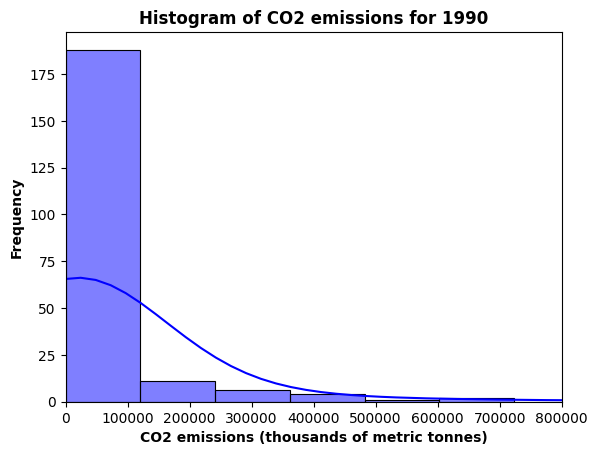

In [25]:
sns.histplot(co2_1990_data, color='blue', bins=40, kde=True)
plt.xlabel('CO2 emissions (thousands of metric tonnes)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Histogram of CO2 emissions for 1990', fontweight = 'bold')
plt.xlim(0, 8e5)
plt.show()

The histogram shows a majority of CO2 emissions below one million metric tonnes, indicating a positive skew relationship.

### Determining the standard deviation and standard error of the mean for the CO2 emissions in 1990. 

Next, we will calculate the standard deviation and standard error of the mean. Then, we can compare and analyze these two values to draw insights.

In [26]:
std_co2_emmisions_1990  = co2_1990_data.std()

stderr_co2_emmisions_1990  = np.std(co2_1990_data, ddof=1) / np.sqrt(len(co2_1990_data))

print(f"The standard deviation is {round(std_co2_emmisions_1990 ,2)}")
print(f"The standard error of the mean is {round(stderr_co2_emmisions_1990 ,2)}")

The standard deviation is 410714.97
The standard error of the mean is 27881.15


The standard deviation of the data is `410714.97` metric tons, which varies greatly from the mean value of the CO2 emissions which is `97411.88` metric tons, this indicates a wide dispersion between the data. The standard error of the mean is `27881.15` metric tonnes, this differs from the standard deviation because this number represents how far the sample mean would vary from the true mean. 

### Change in the CO2 emissions of Brazil, Russia, China, India, the USA and South Africa over time.

A line graph would be a suitable way to illustrate the changes in CO2 emissions of Brazil, Russia, China, India, the USA, and South Africa over time. These countries have undergone significant economic and developmental changes since 1990, and these changes might also be reflected in their CO2 emissions over the years.

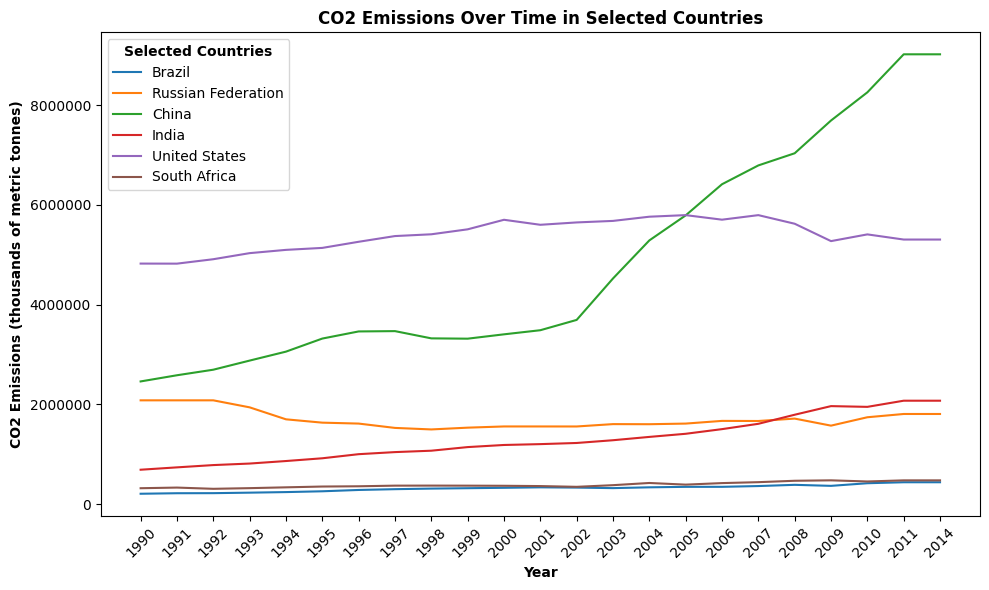

In [27]:
countries = ['Brazil', 'Russian Federation', 'China', 'India', 'United States', 'South Africa']
years = [str(year) for year in range(1990, 2012)] + ['2014']

co2_emissions_selected_countries = mdg_df[(mdg_df['Country'].isin(countries)) & 
                                           (mdg_df['Series'] == 'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)')]

plt.figure(figsize=(10, 6))

for country in countries:
    country_data = co2_emissions_selected_countries[co2_emissions_selected_countries['Country'] == country][years].values.flatten()
    sns.lineplot(x=years, y=country_data, label=country)

plt.xlabel('Year', fontweight='bold')
plt.ylabel('CO2 Emissions (thousands of metric tonnes)', fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')
plt.title('CO2 Emissions Over Time in Selected Countries', fontweight='bold')
legend = plt.legend(title='Selected Countries', loc='best')
legend.get_title().set_fontweight('bold') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the line graph data, it can be observed that South Africa and Brazil have consistently maintained low levels of CO2 emissions over the years. There has been no significant increase or decrease in their emission levels. Conversely, India had high CO2 emissions in 1990, and since then, their emissions have been steadily increasing. The Russian Federation has had a nearly linear progression in its emissions, with a minor decline between 1993 and 1994, and has maintained a stable level since then. China had minor emissions in 1990, but their emissions have shown a significant exponential growth over the years, making them the highest producer of CO2. This could be attributed to their rapid expansion into manufacturing, which produces large amounts of CO2. Lastly, the United States started as the largest emitter of CO2, but its emissions have shown a brief and nearly linear increase.

### Mean and standard deviation statistic for land area covered by forest in 1990.

For this part of the analysis the `mdg_df` dataframe was filtered by the series 'Proportion of land area covered by forest, percentage' to see what insights can be pulled from its analysis

In [28]:
land_area_covered_filter = mdg_df['Series'] == 'Proportion of land area covered by forest, percentage'

land_area_1990_data = mdg_df.loc[land_area_covered_filter, '1990']

mean_land_area_covered_forest_1990  = land_area_1990_data.mean()
std_land_area_covered_forest_1990  = land_area_1990_data.std()

print(f"The mean of the land area covered in 1990 is {round(mean_land_area_covered_forest_1990, 3)}")
print(f"The standard deviation of the land area covered in 1990 is {round(std_land_area_covered_forest_1990, 3)}")

The mean of the land area covered in 1990 is 32.977
The standard deviation of the land area covered in 1990 is 25.498


The mean value is calculated to be `32.977`, with a corresponding standard deviation of `25.498`. Such a large standard deviation suggests a significant variability in the amount of forest-covered land across all countries in the dataframe. This variability may be attributed to the considerable differences in landmass among these countries, which would naturally affect the extent of forest cover.


### Visualisation of the land area covered by forest and the percentage of area protected in 1990. 

Like in the previous dataframe, a histogram is a suitable graph to display how the data within the two dataframes is distributed and will allow us to draw conclusions based on the distribution of these dataframes.

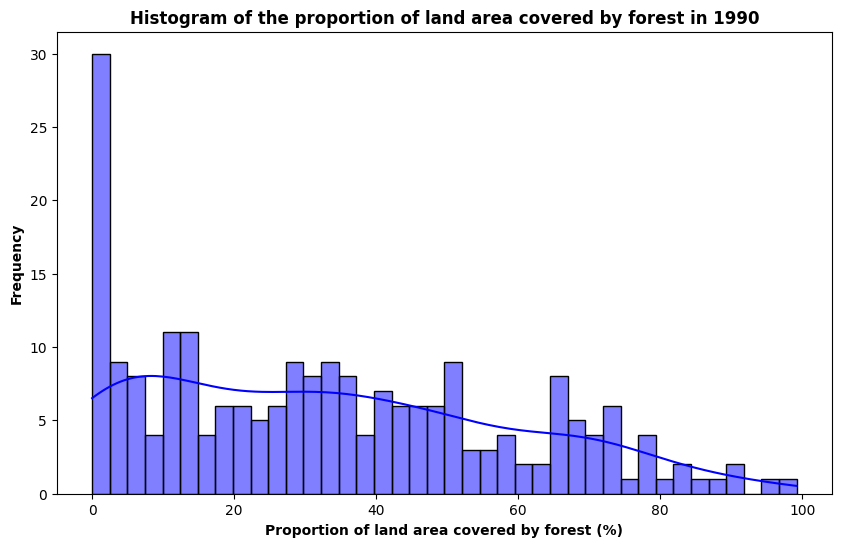

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(land_area_1990_data, color='blue', bins=40, kde=True)
plt.xlabel('Proportion of land area covered by forest (%)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Histogram of the proportion of land area covered by forest in 1990', fontweight = 'bold')
plt.show()

Based on the histogram depicted above, it appears that the data exhibits a positive skew. This is evidenced by the peak being situated towards the left-hand side of the graph and the tail extending towards the right. The observed skewness could account for the relatively high standard deviation value, as it is a contributing factor.

The next step is creating a histogram for the Terrestrial and Marine Areas protected to territorial areas. To do this the same filtering was done one on `mdg_df` as above for the series.

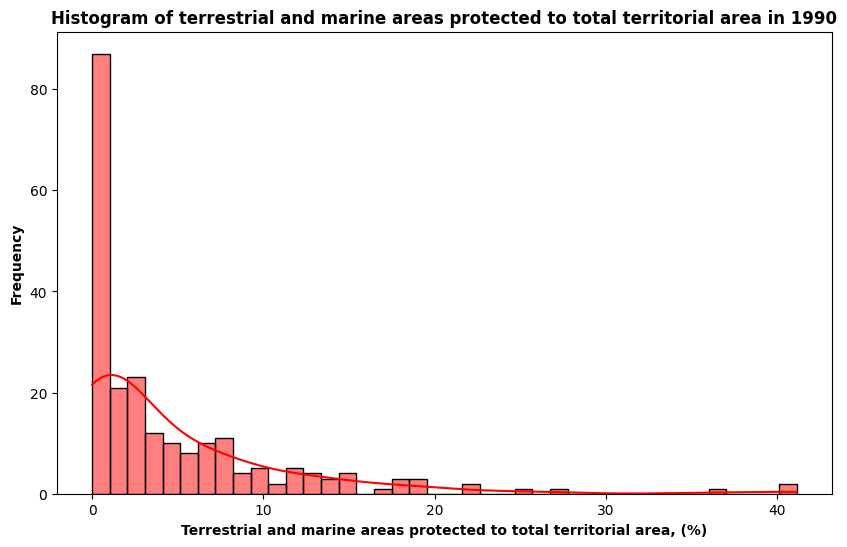

In [30]:
terrestrial_and_marine_filter = mdg_df['Series'] == 'Terrestrial and marine areas protected to total territorial area, percentage'
terrestrial_and_marine_area_1990_data = mdg_df.loc[terrestrial_and_marine_filter, '1990']

plt.figure(figsize=(10,6))
sns.histplot(terrestrial_and_marine_area_1990_data, color='red', bins=40, kde=True)
plt.xlabel('Terrestrial and marine areas protected to total territorial area, (%)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Histogram of terrestrial and marine areas protected to total territorial area in 1990', fontweight = 'bold')
plt.show()

The histogram results differ significantly from the previous one. While the histogram for the proportion of land covered displayed a dispersed visual with no clear peak, the histogram for the protected terrestrial and marine areas showed a positive skew with a definite peak around 2-3%. This indicates that less than 10% of terrestrial and marine areas were protected in 1990, while there was variation in the percentage of land area covered by forests across countries in the same year.

### Visual analysis between the Proportion of Land Area Covered by Forest series and The Percentage of Area Protected series.

In order to determine if there is a correlation between the `Proportion of Land Area Covered by Forest` and `The Percentage of Area Protected`, it would be appropriate to use a scatterplot graph with a regression line. This will help in analyzing the two series and identifying any possible relationship between them.

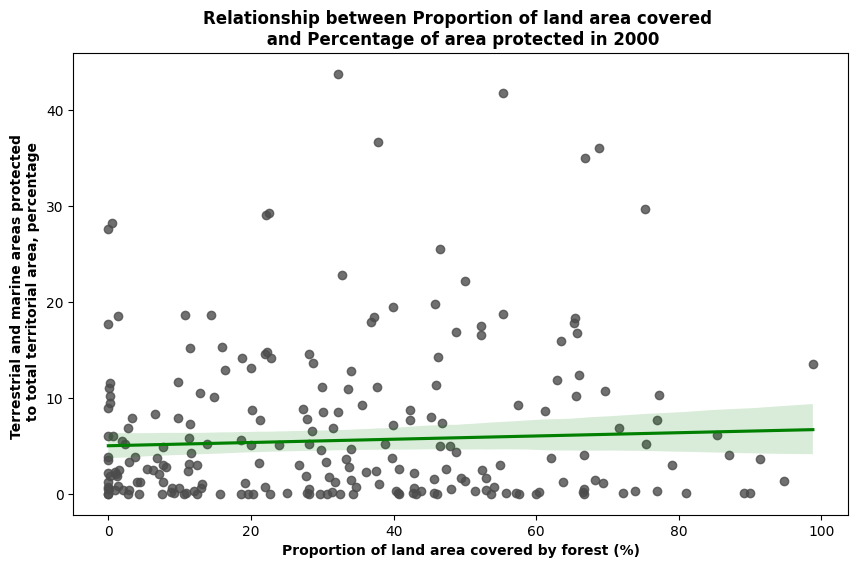

In [31]:
terrestrial_and_marine_filter = mdg_df['Series'] == 'Terrestrial and marine areas protected to total territorial area, percentage'

terrestrial_and_marine_2000_data = mdg_df.loc[terrestrial_and_marine_filter, '2000']
land_area_2000_data = mdg_df.loc[land_area_covered_filter, '2000']

plt.figure(figsize=(10,6))
sns.regplot(x=land_area_2000_data, y=terrestrial_and_marine_2000_data, order=1, robust=True, marker="o", color=".3", line_kws=dict(color="green"))
plt.xlabel("Proportion of land area covered by forest (%)", fontweight='bold')
plt.ylabel("Terrestrial and marine areas protected \n to total territorial area, percentage", fontweight='bold')
plt.title("Relationship between Proportion of land area covered \n and Percentage of area protected in 2000", fontweight='bold')

plt.show()

Based on the scatter plot, there seems to be a slight horizontal linear relationship between the two variables, but there is not much correlation between them. Some outliers are present in the data, which have affected the regression line and caused it to appear more positive than it should be. These outliers are due to high values for the percentage of area protected, which increases the vertical line towards the end. Although there is a minor pattern in the shape of the graph, where the points get less dense as the percentage of terrestrial and marine areas protected to the total area increases, this pattern is not influenced by the proportion of land covered.

### Calculating the Correlation Coefficient for The Proportion of Land Area Covered by Forest data as well as the Terrestrial and Marine Areas Protected to Total Territorial Area, Percentage data. 

To calculate a correlation coefficient between forested land area and protected area, it is necessary to log-transform these variables as they are not normally distributed. Additionally, a histogram will be created to visualize the distributions of both variables.

In [32]:
land_area_covered_2000_df = mdg_df.loc[(mdg_df['SeriesCode'] == 567) & mdg_df['2000']]

log_transformed_land_area_covered_2000_df = land_area_covered_2000_df[['Country', '2000']].copy()
log_transformed_land_area_covered_2000_df['2000'] = log_transformed_land_area_covered_2000_df['2000'].apply(np.log1p)

log_transformed_land_area_covered_2000_df = log_transformed_land_area_covered_2000_df.rename(columns={'2000': 'log_transformed_forested_land_area_value'})

log_transformed_land_area_covered_2000_df.head()


,Country,log_transformed_forested_land_area_value
0,Afghanistan,1.131402
3,Albania,3.370738
6,Algeria,0.530628
9,American Samoa,4.510860
12,Andorra,3.600048


In [33]:
protected_area_2000_df = mdg_df.loc[(mdg_df['SeriesCode'] == 616) & mdg_df['2000']]

log_transformed_protected_area_2000_df = protected_area_2000_df[['Country', '2000']].copy()
log_transformed_protected_area_2000_df['2000'] = log_transformed_protected_area_2000_df['2000'].apply(np.log1p)

log_transformed_protected_area_2000_df = log_transformed_protected_area_2000_df.rename(columns={'2000': 'log_transformed_protected_area_value'})

log_transformed_protected_area_2000_df.head()

,Country,log_transformed_protected_area_value
2,Afghanistan,0.307485
5,Albania,0.392042
8,Algeria,1.943049
11,American Samoa,0.058269
14,Andorra,2.327278


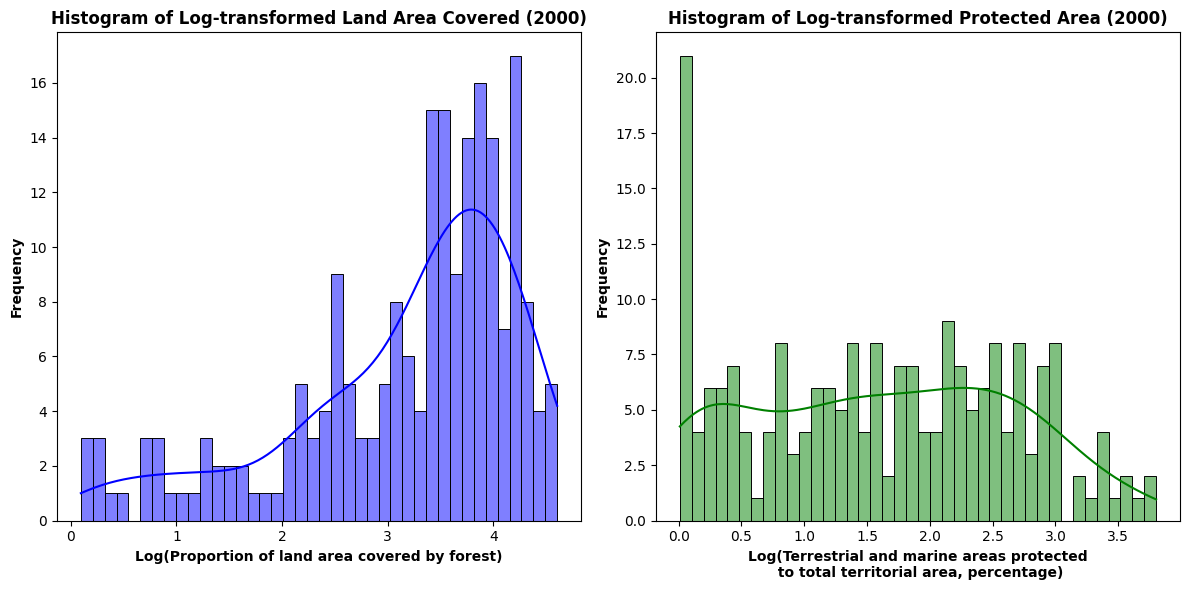

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(log_transformed_land_area_covered_2000_df['log_transformed_forested_land_area_value'], color='blue', bins=40, kde=True)
plt.xlabel('Log(Proportion of land area covered by forest)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Log-transformed Land Area Covered (2000)', fontweight='bold')

plt.subplot(1, 2, 2)
sns.histplot(log_transformed_protected_area_2000_df['log_transformed_protected_area_value'], color='green', bins=40, kde=True)
plt.xlabel('Log(Terrestrial and marine areas protected\n to total territorial area, percentage)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Log-transformed Protected Area (2000)', fontweight='bold')

plt.tight_layout()
plt.show()

After analyzing the histogram of the log of both series values, it appears that the proportion of forest-covered land area follows a negatively skewed Gaussian distribution, while the distribution of terrestrial and marine areas is more dispersed.

### Determining the Pearson correlation coefficient (and its corresponding p-value)

To establish a relationship between the proportion of forest coverage in a land area and the percentage of that area that is protected, the Pearson correlation coefficient and its corresponding p-value can be determined using the pearsonr function from the scipy.stats module.

To use this function, it is necessary to refer back to the cleaned and filtered dataframes named `forest_df` and `protected_df`. Both dataframes have been cleaned and had their NaN values removed based on their series. However, after being cleaned, they have different sizes. Therefore, to calculate the Pearson correlation and its p-value, it is important to ensure that both dataframes have the same size.

In [35]:
land_area_covered_1990_df = mdg_df.loc[(mdg_df['SeriesCode'] == 567) & mdg_df['1990']]
protected_area_1990_df = mdg_df.loc[(mdg_df['SeriesCode'] == 616) & mdg_df['1990']]

log_transformed_land_area_covered_1990_df = land_area_covered_1990_df[['Country', '1990']].copy()
log_transformed_land_area_covered_1990_df['1990'] = log_transformed_land_area_covered_1990_df['1990'].apply(np.log1p)

log_transformed_protected_area_1990_df = protected_area_1990_df[['Country', '1990']].copy()
log_transformed_protected_area_1990_df['1990'] = log_transformed_protected_area_1990_df['1990'].apply(np.log1p)

common_countries = set(log_transformed_land_area_covered_1990_df['Country']).intersection(log_transformed_protected_area_1990_df['Country'])


filtered_land_area_covered_1990_df = log_transformed_land_area_covered_1990_df[log_transformed_land_area_covered_1990_df['Country'].isin(common_countries)]
filtered_protected_area_1990_df = log_transformed_protected_area_1990_df[log_transformed_protected_area_1990_df['Country'].isin(common_countries)]


land_area_covered_1990_values = filtered_land_area_covered_1990_df['1990'].values
protected_area_1990_values = filtered_protected_area_1990_df['1990'].values

pearson_correlation_coefficient_1990, pearson_p_value_1990 = sp.pearsonr(land_area_covered_1990_values, protected_area_1990_values)

print(f"The Pearson correlation coefficient of the two variables is {round(pearson_correlation_coefficient_1990, 5)}")
print(f"Its p-value is {round(pearson_p_value_1990, 5)}")


The Pearson correlation coefficient of the two variables is 0.13108
Its p-value is 0.07612


The `set()` attribute was used to ensure that the values used in both series are of the same corresponding countries, this was to ensure data consistency and remove any bias that could emerge and ensure validity in the analysis.

There is a positive correlation coefficient between two series that were measured and linearised in 1990. This means that there is a positive, yet weak linear correlation between the proportion of land area covered by forests and the percentage of the area that is protected. In simpler terms, as the proportion of land area covered by forests increases, the percentage of the area that is protected also tends to increase. However, it is important to note that this linear relationship does not imply causation. 

If the null hypothesis states that there is no relationship between the two series, or that the correlation coefficient is zero. The alternative hypothesis (H1)  states that there is a relationship between the two series, and the correlation coefficient is not zero.
Using a significance level of 0.05, `0.07612` >= 0.05 this fails to reject the null hypothesis. In other words: there is not enough evidence to conclude that there is a significant linear relationship between the two variables at the 5% significance level.

### Calculate the Spearman Rank-Order Correlation Coefficient. 

This test only examines the order in which categories are placed, and not the actual values. As a result, the Spearman Rank-Order Coefficient is not affected by variables that are not normally distributed, or by outliers. The findings of this test will be compared to those obtained from the Pearson Correlation coefficient to determine any similarities or differences, and to understand what those differences might mean.

In [36]:
spearman_p_value_1990, spearman_correlation_coefficient_1990  = sp.spearmanr(land_area_covered_1990_values, protected_area_1990_values)

print(f"The Spearman Rank-Order Correlation Coefficient of the two variables is {round(spearman_correlation_coefficient_1990, 5)}")
print(f"Its p-value is {round(spearman_p_value_1990, 5)}")

The Spearman Rank-Order Correlation Coefficient of the two variables is 0.34231
Its p-value is 0.0704


The Spearman Rank-Order correlation coefficient value of `0.34231` suggests that there is a moderate positive monotonic relationship between the two series being analyzed. This coefficient is based on the rank of the data values rather than their actual numerical values. Therefore, it is more suitable for variables that do not have a linear relationship or when the data are ordinal or not normally distributed. 

It is worth noting that the value of the Spearman rank-order coefficient is greater than the value of the Pearson correlation, indicating that there is a stronger monotonic relationship between the proportion of land area covered by forests and the percentage of the area that is protected.

The Spearman Rank-Order Correlation Coefficient has a p-value of `0.0704`, which means that there is a 7.04% chance of observing the correlation coefficient calculated if the null hypothesis is true. The null hypothesis usually assumes that there is no correlation between the variables. Therefore, we fail to reject the null hypothesis at the 0.05 level of significance. Hence, we do not have enough evidence to conclude that there is a significant correlation between the variables at the conventional level of significance.

___

# 3 Conclusions and Insights

The initial stage of the report centred on data cleaning and preparation, which involved filtering it by the three series that focused on the different Millennium Development Goals. These were the proportion of land area covered by forest, carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC), and terrestrial and marine areas protected to the total territorial area. After removing unnecessary columns and all NaN values, the analysis was ready to proceed.

Regarding CO2 emissions, the primary focus was on the year 1990, and the data was found to be positively skewed. The attention then shifted to emissions in six countries - Brazil, Russia, China, India, the USA, and South Africa - over time. Most countries showed steady inclines, while some had constant emissions over time such as India and South Africa. Only China demonstrated a significant exponential increase over the years.

The subsequent focus was on the relationship between the proportion of land area covered by forest and terrestrial and marine areas protected to the total territorial area. By linearizing the two series columns and plotting a scatter plot with a linear regression line, a positive linear relationship was discovered. This was further supported by the results of the Pearson correlation coefficient yet the results of the Spearman Rank-Order Correlation Coefficient would then suggest that the correlation observed would be due to other factors or random chance.


___